In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../nyc_data.csv')
df.head()

,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit
0,60912,CONFIDENTIAL,Confidential,2016-04-29T00:00:00.000,2016-04-29T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
1,60914,CONFIDENTIAL,Confidential,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
2,60917,CONFIDENTIAL,Confidential,2016-04-19T00:00:00.000,2016-04-19T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
3,60919,CONFIDENTIAL,Confidential,2016-04-26T00:00:00.000,2016-04-26T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26T00:00:00.000,2023-04-18T00:00:00.000,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   project_id                     3634 non-null   int64 
 1   project_name                   3634 non-null   object
 2   program_group                  3634 non-null   object
 3   project_start_date             3634 non-null   object
 4   project_completion_date        2660 non-null   object
 5   extended_affordability_status  3634 non-null   object
 6   prevailing_wage_status         3634 non-null   object
 7   extremely_low_income_units     3634 non-null   int64 
 8   very_low_income                3634 non-null   int64 
 9   low_income_units               3634 non-null   int64 
 10  moderate_income                3634 non-null   int64 
 11  middle_income                  3634 non-null   int64 
 12  other                          3634 non-null   int64 
 13  cou

Missing values for planned_tax benefit and project completion date.

In [3]:
df.describe()

,project_id,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,70150.063566,9.285360,16.686296,15.976059,3.263897,6.781783,0.207760,39.446340,12.754816,52.201156,74.047606,3.908641
std,3655.044438,36.481356,225.380706,98.501496,24.093096,23.985613,0.672724,140.559754,284.076631,315.367743,326.370406,21.384991
min,60912.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,67748.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,70539.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,6.000000,16.000000,0.000000
75%,73220.750000,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,28.000000,1.000000,33.000000,61.000000,0.000000
max,75733.000000,572.000000,11413.000000,3959.000000,542.000000,455.000000,11.000000,5881.000000,15372.000000,15372.000000,15372.000000,291.000000


When looking at the means for income units per project, very_low_income units is the highest while moderate_income is the lowest. Low_income_units are the second highest. The mean is higher for counted_rental units, compared to counted_homeownership units. 

In [4]:
# Get value counts for categorical columns
categorical_cols = ['program_group', 'extended_affordability_status', 'prevailing_wage_status', 'planned_tax_benefit']
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Value counts for categorical columns:

Column: program_group
program_group
Multifamily Incentives Program    1928
Confidential                      1052
Multifamily Finance Program        632
Small Homes Program                 22
Name: count, dtype: int64

Column: extended_affordability_status
extended_affordability_status
No     3423
Yes     211
Name: count, dtype: int64

Column: prevailing_wage_status
prevailing_wage_status
Non Prevailing Wage    3575
Prevailing Wage          59
Name: count, dtype: int64

Column: planned_tax_benefit
planned_tax_benefit
421a             1853
Article XI        276
420c              274
Article II         23
Article V          17
420a               11
J-51 Enriched       9
J-51                9
UDAAP               3
Article IV          3
Name: count, dtype: int64


~53% of the housing projects are associated with Multifamily Incentives Program under program_group. This variable is not further explained in the provided data dictionary.

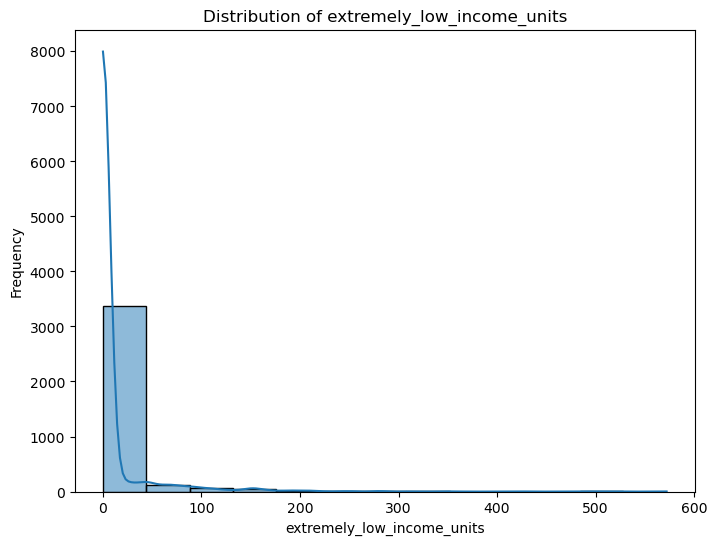

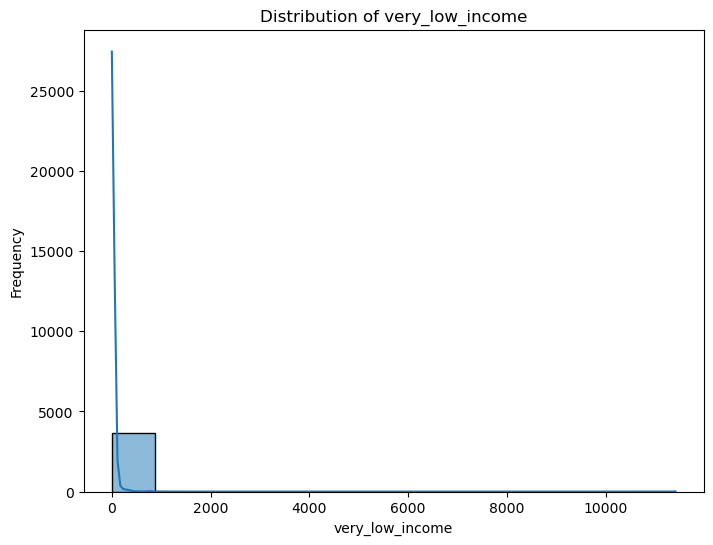

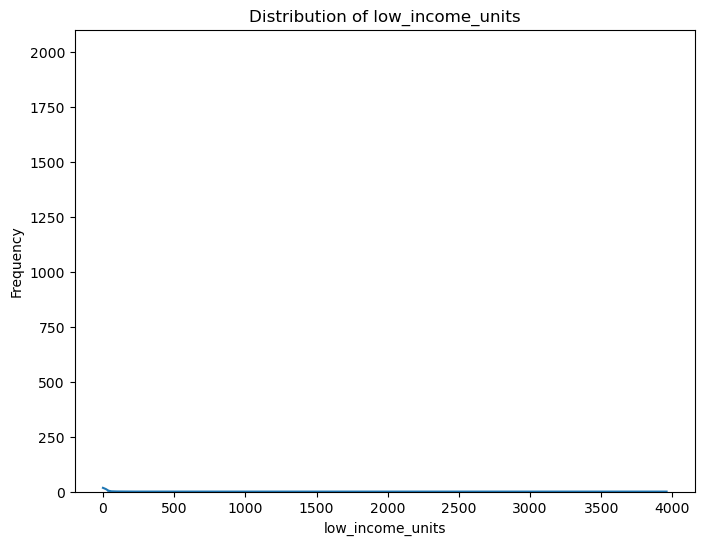

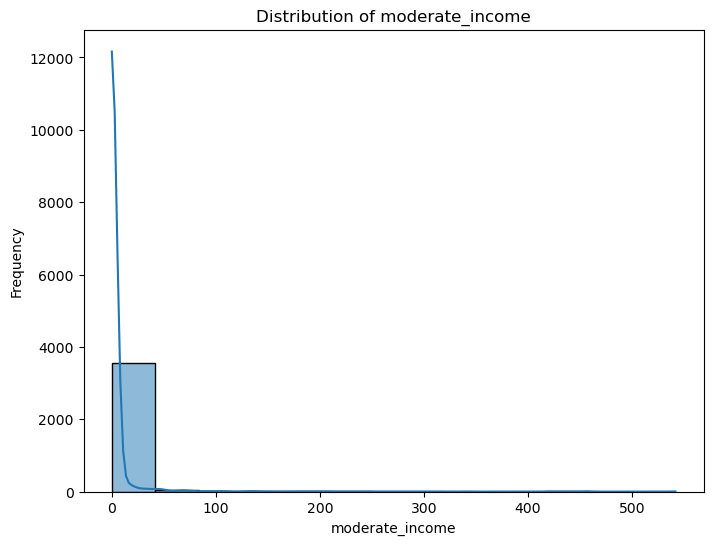

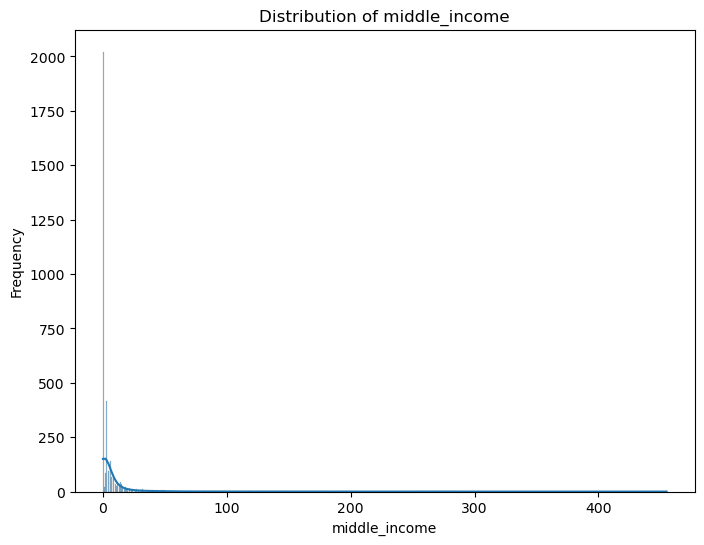

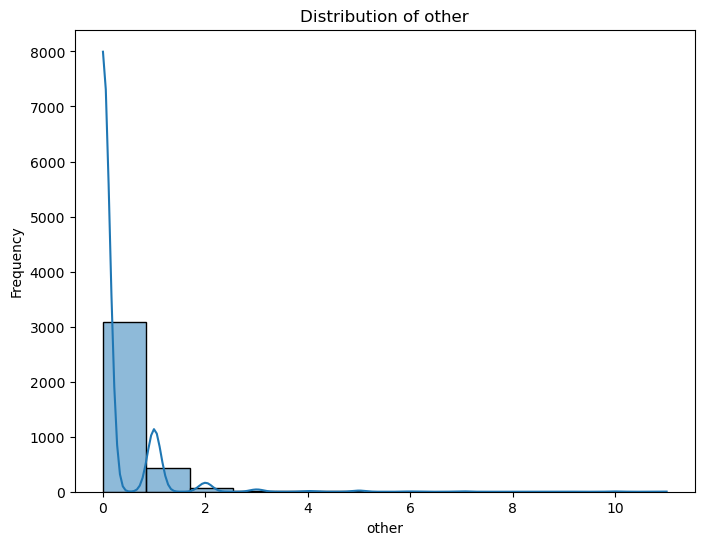

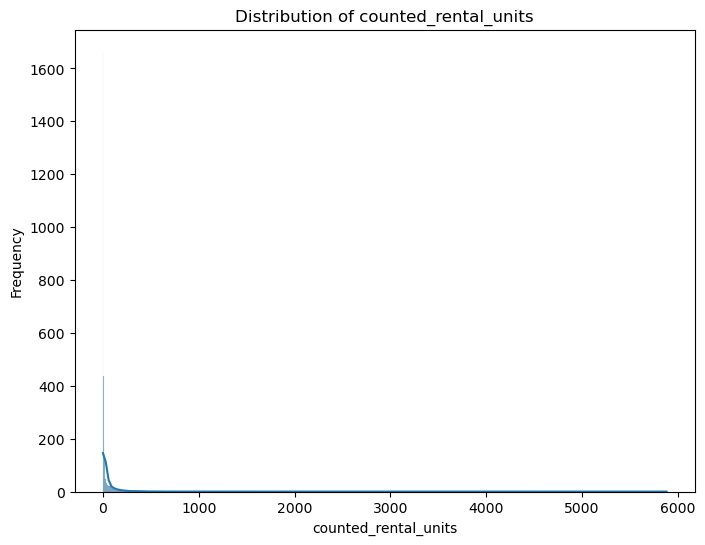

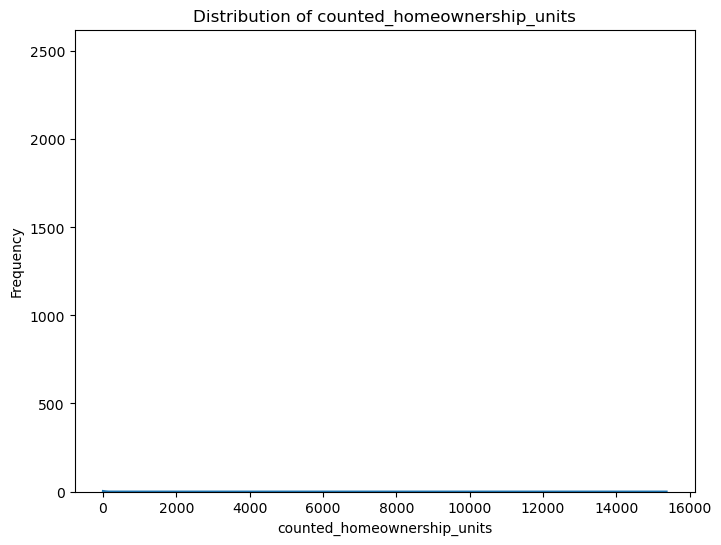

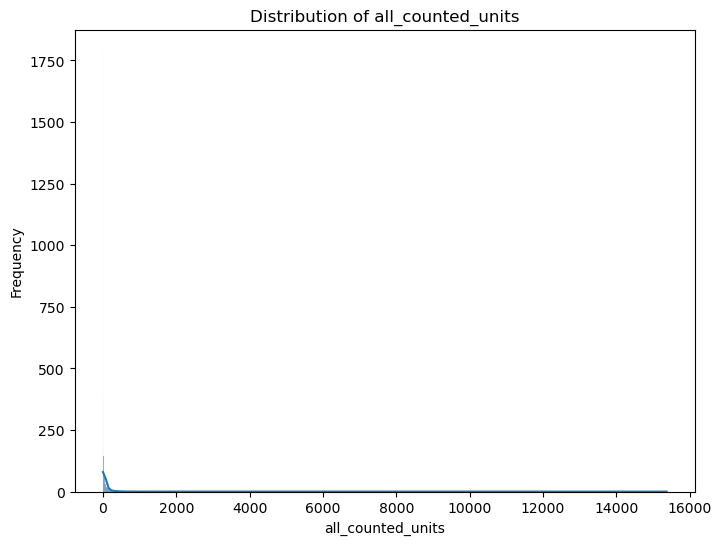

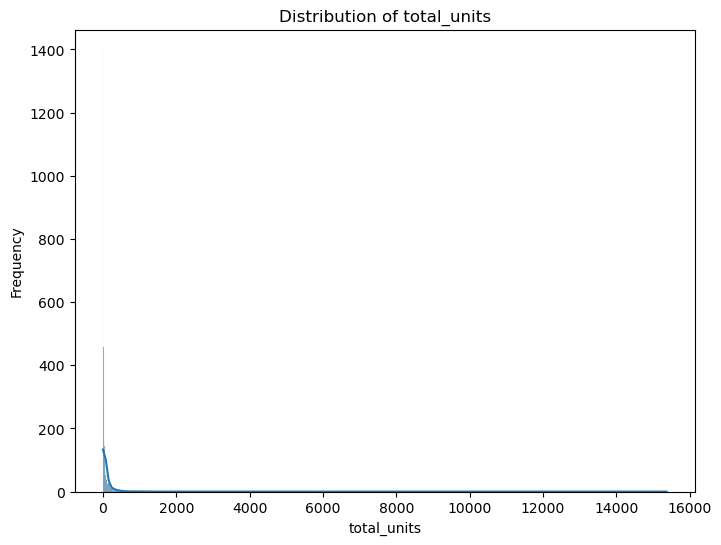

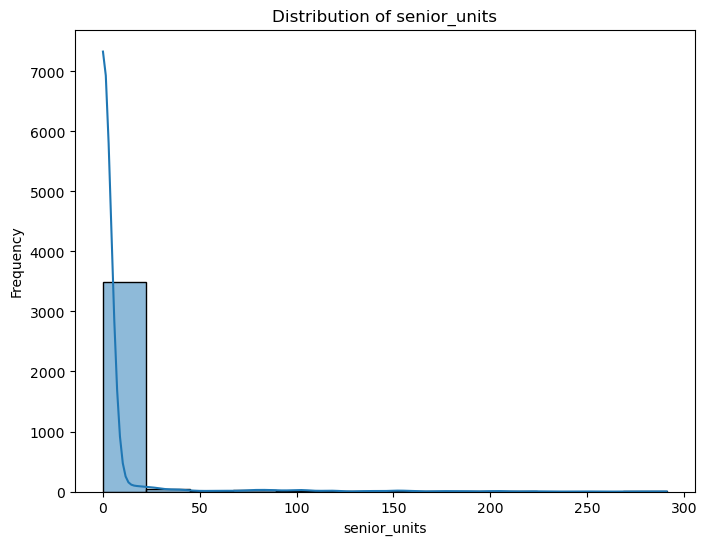

In [5]:
# Visualize distributions of numerical columns (histograms)
numerical_cols = ['extremely_low_income_units', 'very_low_income', 'low_income_units', 'moderate_income', 'middle_income', 'other', 'counted_rental_units', 'counted_homeownership_units', 'all_counted_units', 'total_units', 'senior_units']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

A majority of the distributions are skewed to the right.

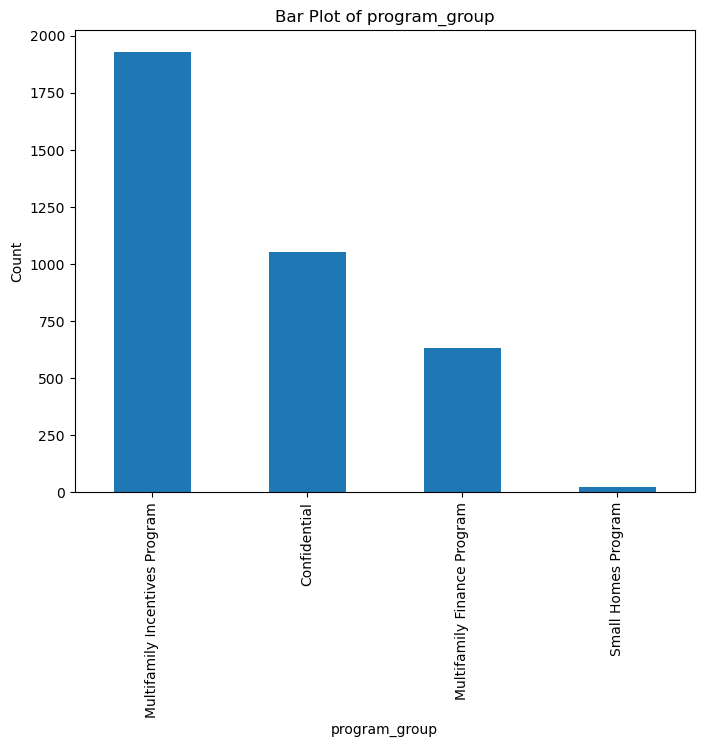

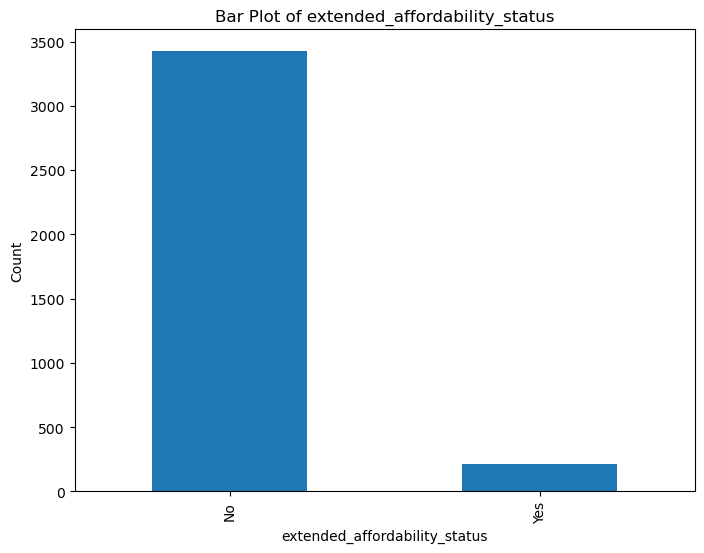

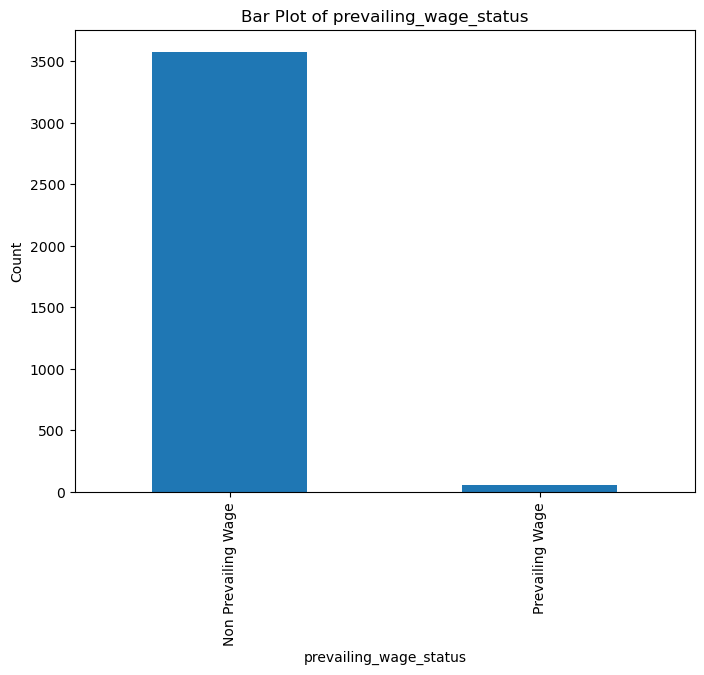

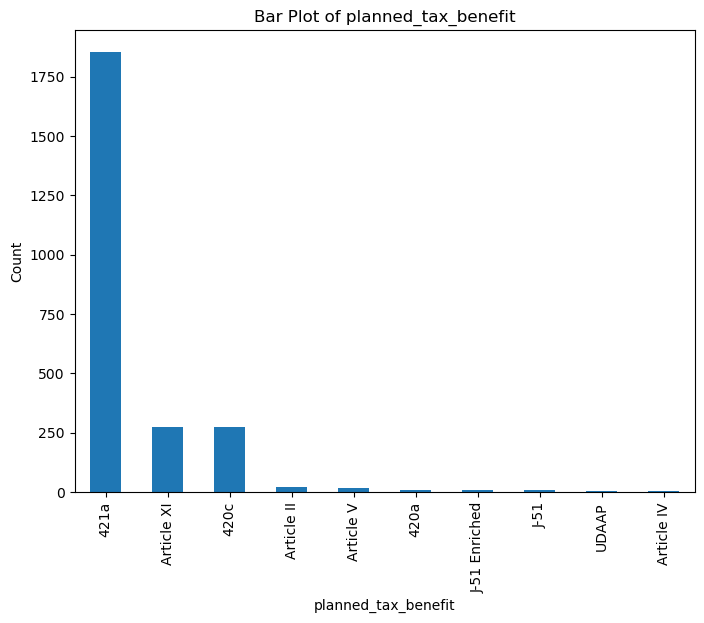

In [6]:
# Visualize distributions of categorical columns (bar plots)
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Most projects are not extended affordability and non-prevailing wage. The most common tax benefit is 421a. 

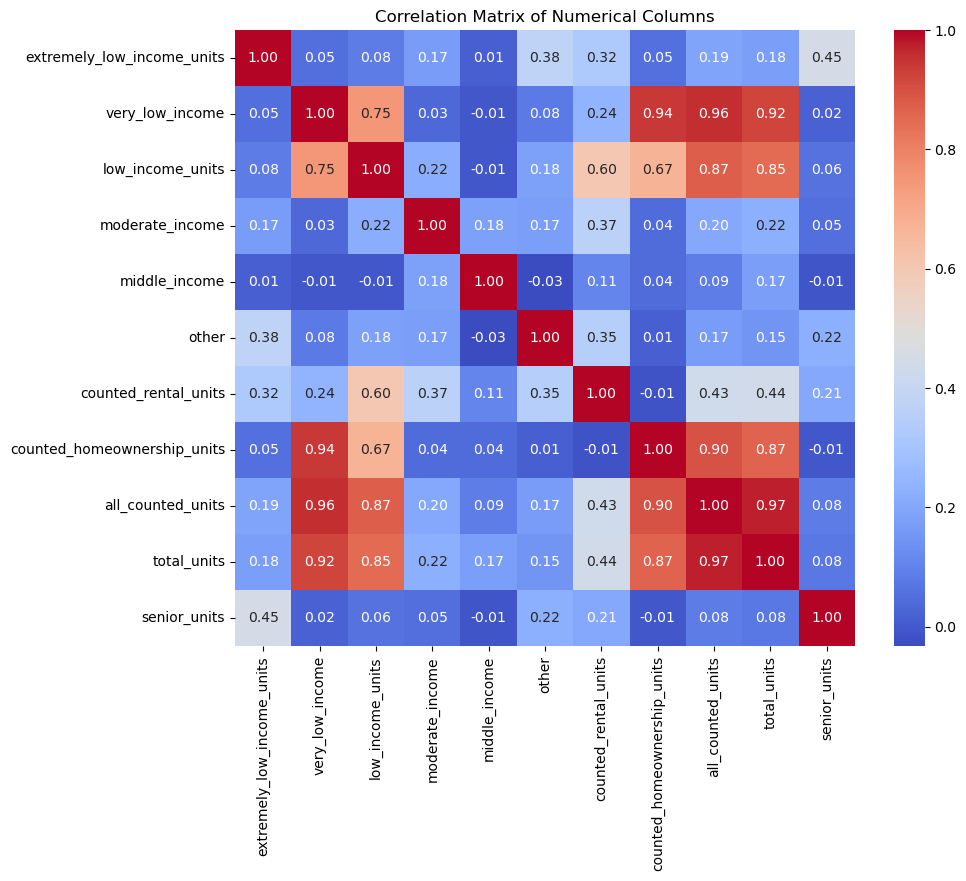

In [7]:
# Bivariate Analysis: Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

There is a very strong correlation with very_low_income and counted_homeownership_units, all_counted_units, and total_units. There is also a strong correlation with low_income units and all_counted_units and total_units. 

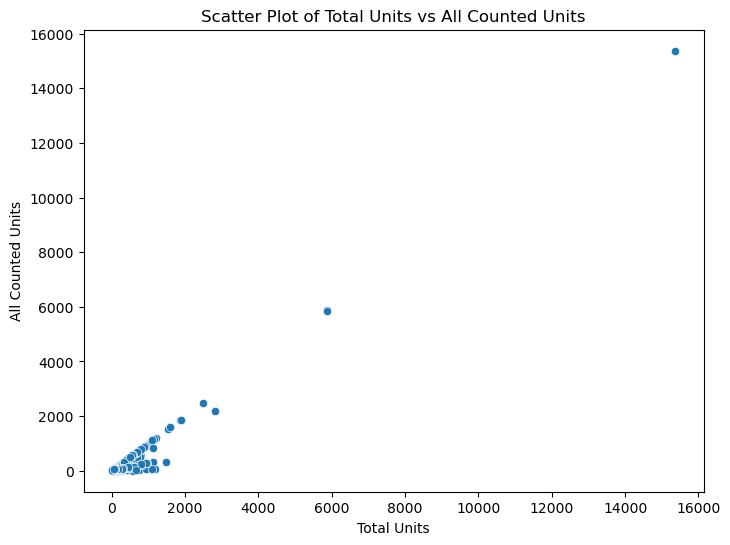

In [8]:
# Bivariate Analysis: Scatter plot of 'total_units' vs 'all_counted_units'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_units', y='all_counted_units', data=df)
plt.title('Scatter Plot of Total Units vs All Counted Units')
plt.xlabel('Total Units')
plt.ylabel('All Counted Units')
plt.show()

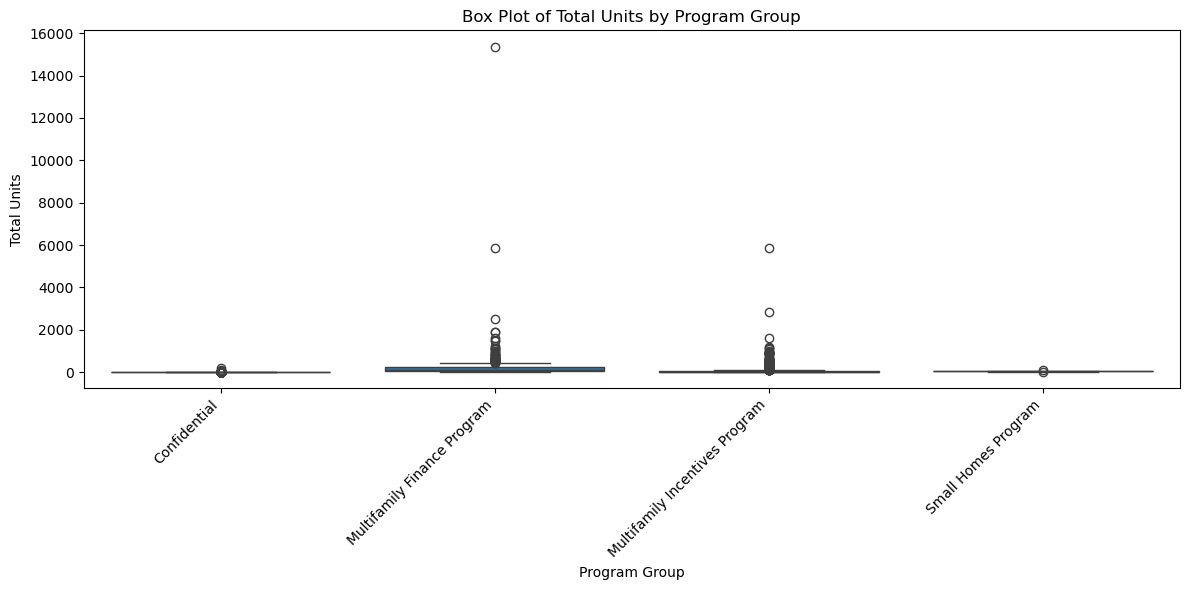

In [9]:
# Bivariate Analysis: Boxplot of 'total_units' by 'program_group'
plt.figure(figsize=(12, 6))
sns.boxplot(x='program_group', y='total_units', data=df)
plt.title('Box Plot of Total Units by Program Group')
plt.xlabel('Program Group')
plt.ylabel('Total Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

After conducting some initial analysis, I will further explore the data, focusing on completed projects and their duration.

In [10]:
#Create a new project duration variable
df['project_start_date'] = pd.to_datetime(df['project_start_date'], errors='coerce')
df['project_completion_date'] = pd.to_datetime(df['project_completion_date'], errors='coerce')

df['project_duration_days'] = (df['project_completion_date'] - df['project_start_date']).dt.days

df.dropna(subset=['project_duration_days'], inplace=True)
          
print(df[['project_name', 'project_start_date', 'project_completion_date', 'project_duration_days']])
df.head()

                 project_name project_start_date project_completion_date  \
0                CONFIDENTIAL         2016-04-29              2016-04-29   
1                CONFIDENTIAL         2016-04-18              2016-04-18   
2                CONFIDENTIAL         2016-04-19              2016-04-19   
3                CONFIDENTIAL         2016-04-26              2016-04-26   
4     FAC. 6309 FOURTH AVENUE         2019-11-26              2023-04-18   
...                       ...                ...                     ...   
3547             CONFIDENTIAL         2024-06-21              2024-06-21   
3548             CONFIDENTIAL         2024-06-21              2024-06-21   
3561             CONFIDENTIAL         2024-06-27              2024-06-27   
3562             CONFIDENTIAL         2024-06-27              2024-06-27   
3563             CONFIDENTIAL         2024-06-28              2024-06-28   

      project_duration_days  
0                       0.0  
1                       0.0

,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit,project_duration_days
0,60912,CONFIDENTIAL,Confidential,2016-04-29,2016-04-29,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN,0.0
1,60914,CONFIDENTIAL,Confidential,2016-04-18,2016-04-18,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN,0.0
2,60917,CONFIDENTIAL,Confidential,2016-04-19,2016-04-19,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN,0.0
3,60919,CONFIDENTIAL,Confidential,2016-04-26,2016-04-26,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN,0.0
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26,2023-04-18,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c,1239.0


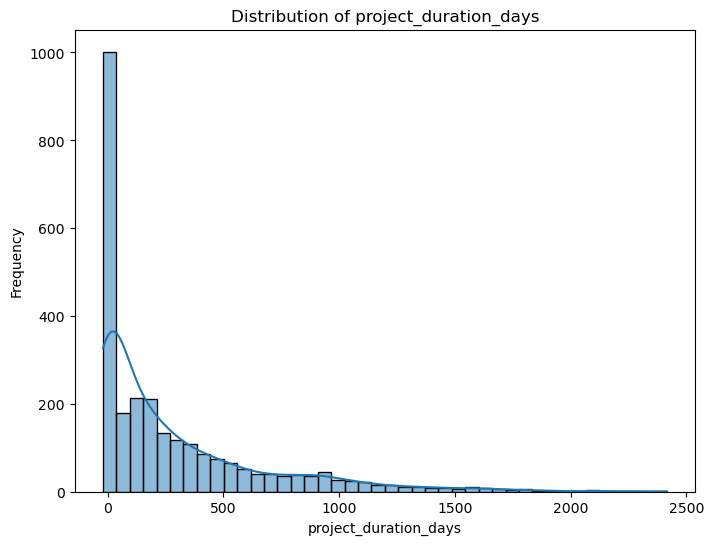

In [11]:
# Visualize distributions new numerical columns (histograms)
numerical_cols = ['project_duration_days']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 3563
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_id                     2660 non-null   int64         
 1   project_name                   2660 non-null   object        
 2   program_group                  2660 non-null   object        
 3   project_start_date             2660 non-null   datetime64[ns]
 4   project_completion_date        2660 non-null   datetime64[ns]
 5   extended_affordability_status  2660 non-null   object        
 6   prevailing_wage_status         2660 non-null   object        
 7   extremely_low_income_units     2660 non-null   int64         
 8   very_low_income                2660 non-null   int64         
 9   low_income_units               2660 non-null   int64         
 10  moderate_income                2660 non-null   int64         
 11  middle_income         

,project_id,project_start_date,project_completion_date,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,project_duration_days
count,2660.000000,2660,2660,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,69513.262030,2020-06-12 06:28:41.503759360,2021-03-20 05:48:05.413533696,6.990977,13.448120,13.313910,2.989474,6.042481,0.181203,31.587970,11.378195,42.966165,59.540977,3.332707,280.971805
min,60912.000000,2014-02-04 00:00:00,2015-04-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-20.000000
25%,67344.500000,2018-09-19 00:00:00,2019-05-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,69756.500000,2020-06-30 00:00:00,2021-09-20 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,10.000000,0.000000,134.500000
75%,72457.250000,2022-04-04 06:00:00,2023-02-24 00:00:00,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,14.000000,1.000000,16.000000,41.250000,0.000000,410.250000
max,75633.000000,2024-06-28 00:00:00,2024-06-28 00:00:00,520.000000,11413.000000,3959.000000,542.000000,455.000000,11.000000,5881.000000,15372.000000,15372.000000,15372.000000,291.000000,2415.000000
std,3542.002577,NaN,NaN,32.487413,237.837623,104.544775,24.317225,24.602643,0.684173,141.182992,308.054004,337.803477,347.567246,20.275709,380.050811


The average project took 281 days to complete, with some projects taking over six years! The median project took 135 days.

In [13]:
negative_duration_count = (df['project_duration_days'] < 0).sum()
print(f"Number of negative project duration values: {negative_duration_count}")

Number of negative project duration values: 2


Two rows show a negative value for project duration, revealing some administrative errors when the project start and completion dates were being entered.

In [14]:
#Deleted rows with administrative error
df = df[df['project_duration_days'] >= 0]
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2658 entries, 0 to 3563
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_id                     2658 non-null   int64         
 1   project_name                   2658 non-null   object        
 2   program_group                  2658 non-null   object        
 3   project_start_date             2658 non-null   datetime64[ns]
 4   project_completion_date        2658 non-null   datetime64[ns]
 5   extended_affordability_status  2658 non-null   object        
 6   prevailing_wage_status         2658 non-null   object        
 7   extremely_low_income_units     2658 non-null   int64         
 8   very_low_income                2658 non-null   int64         
 9   low_income_units               2658 non-null   int64         
 10  moderate_income                2658 non-null   int64         
 11  middle_income         

,project_id,project_start_date,project_completion_date,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,project_duration_days
count,2658.000000,2658,2658,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,69515.825056,2020-06-12 11:42:39.819413248,2021-03-20 16:20:35.214446848,6.996238,13.458239,13.323552,2.975169,6.047028,0.181339,31.611738,11.369827,42.981565,59.568849,3.335214,281.193002
min,60912.000000,2014-02-04 00:00:00,2015-04-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,67345.250000,2018-09-19 06:00:00,2019-05-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,69756.500000,2020-06-30 00:00:00,2021-09-21 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,10.000000,0.000000,135.000000
75%,72457.750000,2022-04-04 18:00:00,2023-02-24 00:00:00,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,14.000000,1.000000,16.000000,41.000000,0.000000,410.750000
max,75633.000000,2024-06-28 00:00:00,2024-06-28 00:00:00,520.000000,11413.000000,3959.000000,542.000000,455.000000,11.000000,5881.000000,15372.000000,15372.000000,15372.000000,291.000000,2415.000000
std,3540.164008,NaN,NaN,32.499072,237.926833,104.583522,24.313289,24.611342,0.684413,141.233457,308.169207,337.929608,347.696047,20.283133,380.108150


After data cleaning, 2658 projects were shown to be completed out of the 3634 projects listed in the initial data. The smallest project had a total of one unit, while some of the largest projects were very_low_income and homeownership. 

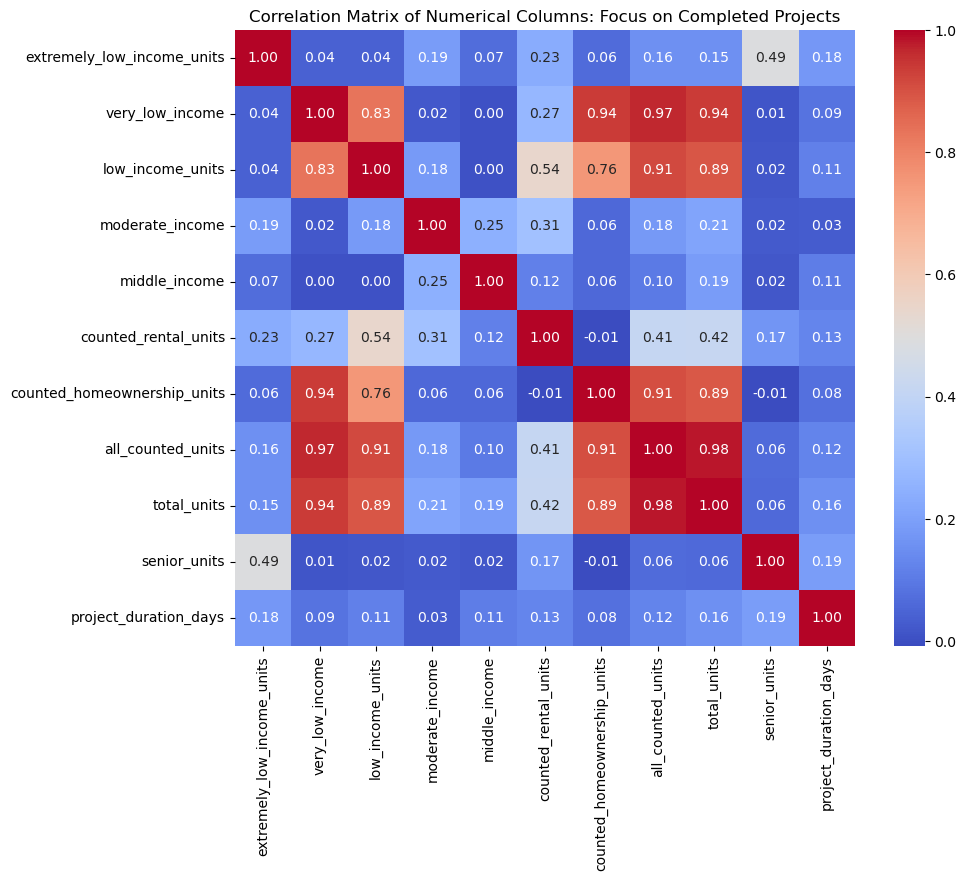

In [15]:
# Bivariate Analysis Part 2: Correlation heatmap for numerical columns
numerical_cols_2 = ['extremely_low_income_units', 'very_low_income', 'low_income_units', 'moderate_income', 'middle_income', 'counted_rental_units', 'counted_homeownership_units', 'all_counted_units', 'total_units', 'senior_units', 'project_duration_days']
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols_2].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns: Focus on Completed Projects')
plt.show()

An additional strong correlation has been shown between low_income_units and counted_homeownership_units!

In [16]:
print("\nGrouped Analysis - Average Duration by Program Group:")
grouped_duration = df.groupby('program_group')['project_duration_days'].mean()
print(grouped_duration)


Grouped Analysis - Average Duration by Program Group:
program_group
Confidential                        66.286861
Multifamily Finance Program        521.556136
Multifamily Incentives Program     371.083662
Small Homes Program               1036.727273
Name: project_duration_days, dtype: float64


Housing projects associated with the small homes program had the longest duration, while multifamily incentives program were completed the quickest. 